# (Chicago Crime Data Analysis and Visualization)
## by (Amr Morsy)

## Investigation Overview

> The goal of the presentation is to find the the rate of the crimes and get some information about the police and the crime rate in Chicago.

## Dataset Overview

> This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2004 to present

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
rangeStarts = [(2005, 2), (2008, 3), (2012, 5)]
crimes = []

for i, rng in enumerate(rangeStarts):
  file =   'Chicago_Crimes_%d_to_%d.csv' % (rng[0], rng[0] + rng[1])
  crimes.append(pd.read_csv(file, error_bad_lines = False))

# Comment: Concatenate the files in one dataframe
allCrimes = pd.concat(crimes, ignore_index = True, axis = 0)


#Convert the data format
allCrimes.Date = pd.to_datetime(allCrimes.Date, format ='%m/%d/%Y %I:%M:%S %p')
allCrimes.index = pd.DatetimeIndex(allCrimes.Date)
#Select Most Common Crime Locations and Descriptions
selectedCategories = 25
print(allCrimes['Location Description'].value_counts())

# Find most common
mostFrequentLocations  = list(allCrimes['Location Description'].value_counts()[:selectedCategories].index)
mostFrequentDescription= list(allCrimes['Description'].value_counts()[:selectedCategories].index)

# Replace other locations with 'OTHER'
allCrimes.loc[~allCrimes['Location Description'].isin(mostFrequentLocations) , allCrimes.columns=='Location Description'] = 'OTHER'
allCrimes.loc[~allCrimes['Description'].isin(mostFrequentLocations) , allCrimes.columns=='Description'] = 'OTHER'

#Convert Column Types into Categorical
allCrimes['Primary Type']         = pd.Categorical(allCrimes['Primary Type'])
allCrimes['Location Description'] = pd.Categorical(allCrimes['Location Description'])
allCrimes['Description']          = pd.Categorical(allCrimes['Description'])
#change bool to string to plot it later 
allCrimes['Arrest']  =allCrimes['Arrest'].astype(str)
allCrimes['Domestic']=allCrimes['Domestic'].astype(str)
#Remove Unnecessary Columns
allCrimes.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On', 'FBI Code', 'Beat',
                'Ward'], inplace = True, axis = 1)
allCrimes.dropna(inplace=True)
allCrimes.drop_duplicates(inplace=True)
#remove year 2017 it has small number of records
allCrimes.drop(allCrimes[allCrimes['Year']==2017].index, axis = 0, inplace=True)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


STREET                1517724
RESIDENCE              991977
SIDEWALK               674793
APARTMENT              668298
OTHER                  216154
                       ...   
YMCA                        1
CTA "L" TRAIN               1
PUBLIC HIGH SCHOOL          1
COACH HOUSE                 1
LAGOON                      1
Name: Location Description, Length: 161, dtype: int64


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Crimes per year)

> The number of crimes decreases over year which means that police is going on the rightway. Also we should notice that 2005 is the most year that has crimes

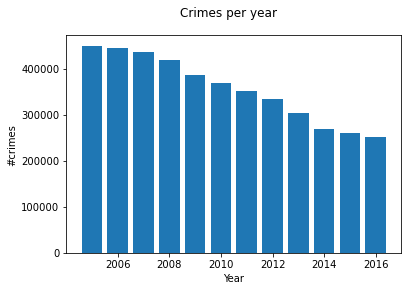

In [4]:
x=allCrimes.groupby(allCrimes['Year'])['Year'].unique()
y=allCrimes.groupby(allCrimes['Year'])['ID'].count()

plt.bar(x, y)
plt.suptitle('Crimes per year')
# Labeling the axes
plt.xlabel('Year')
plt.ylabel('#crimes')

# Dsiplay the plot
plt.show()

## (Crime count)

> Theft and Battery are the most crime that happen in chicago over the years

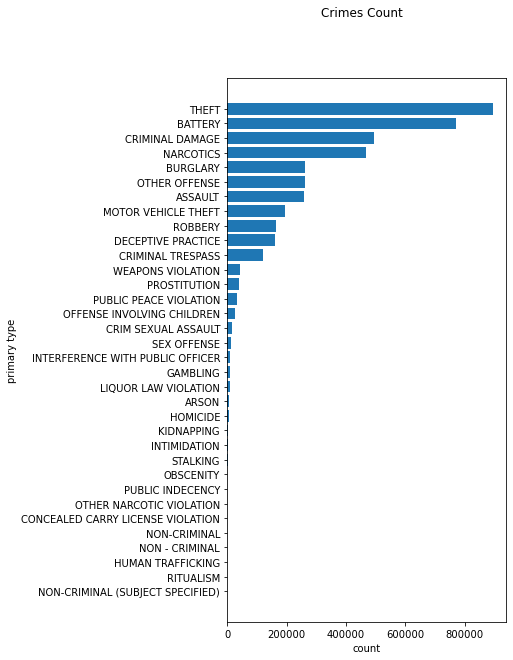

In [5]:
val=(allCrimes['Primary Type']).value_counts (ascending=True)
x=val.index
y=val.values
plt.subplots(figsize=(5,10))
plt.barh(x, y)
#plt.invert_yaxis()
# Labeling the axes
plt.suptitle('Crimes Count')
plt.xlabel('count')
plt.ylabel('primary type')

# Dsiplay the plot
plt.show()

## (Number of Arrested)
> more than half of the crimiminals are not arrested ! the chicago police has to increase its efficiency 


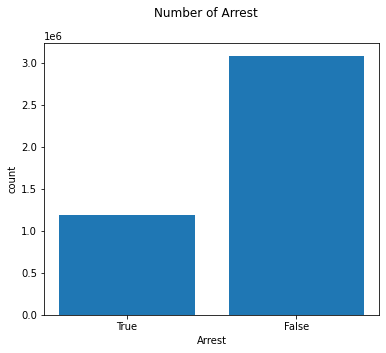

In [6]:
val=(allCrimes['Arrest']).value_counts (ascending=True)
x=val.index
y=val.values
plt.subplots(figsize=(6,5))
plt.bar(x, y)
#plt.invert_yaxis()
# Labeling the axes
plt.suptitle('Number of Arrest')
plt.ylabel('count')
plt.xlabel('Arrest')

# Dsiplay the plot
plt.show()

## (Crime Rate per year)
> some of the crimes decreased throw time which mean the police is going in the right direction such as 
    >>Battery, Sex Offense, Prosttituion, public peace violation,offense, liquor law violation and Gambling 
    

>But in some other crime there was a decreasing but since arround 2015 the crime started to increase such as
>>Robbery,motor vechile theft, Arson, Assual.




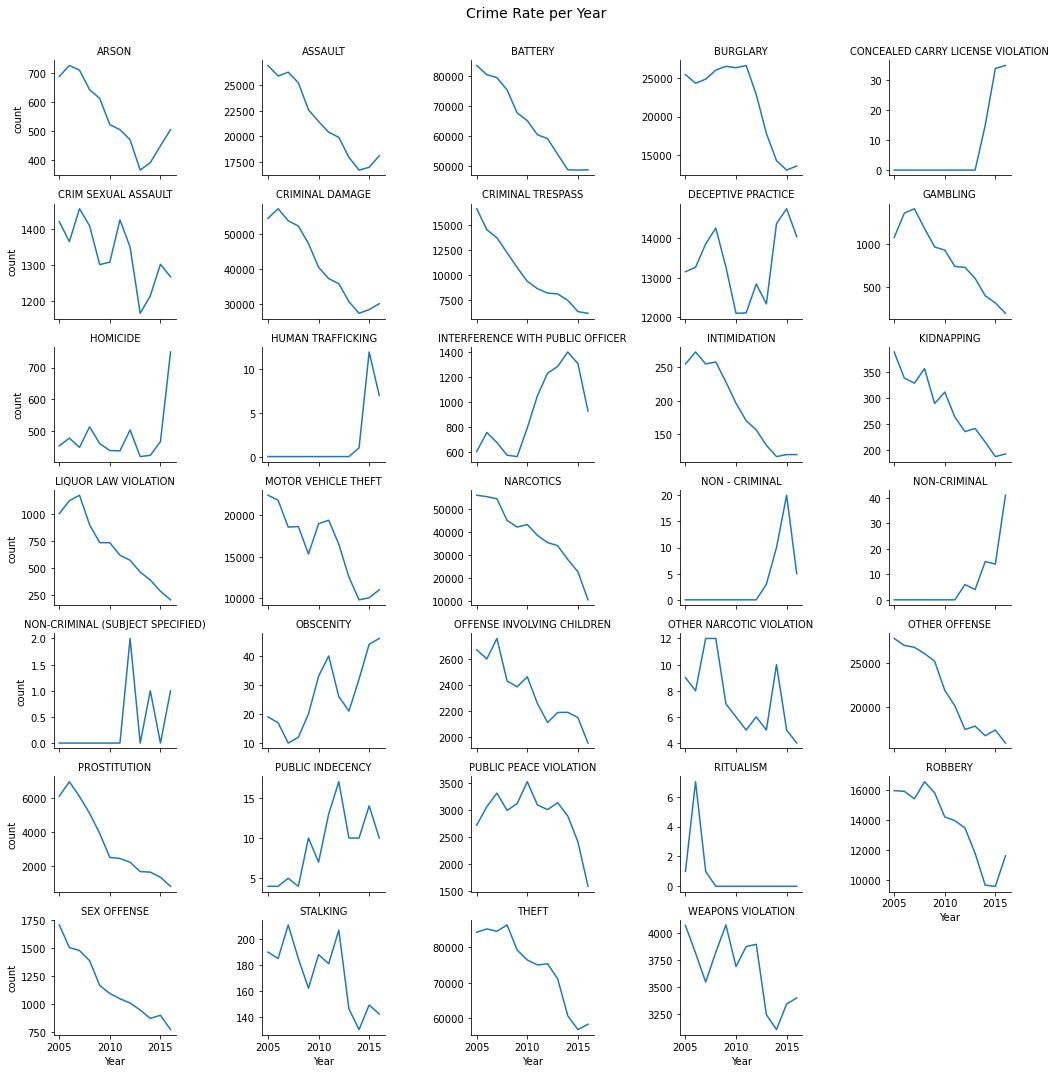

In [7]:
crimes_counts = allCrimes.groupby(['Primary Type','Year']).size()
crimes_counts = crimes_counts.reset_index(name = 'count')

#fig, ax = plt.subplots(figsize=(10*10))
g = sb.FacetGrid(data = crimes_counts, col = 'Primary Type',col_wrap = 5,sharey = False)

g.map(sb.lineplot , "Year","count");

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.fig.suptitle("Crime Rate per Year", size=14)
g.fig.subplots_adjust(top=0.93)
g.fig.set_size_inches(15,15)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!